In [146]:
import numpy as np
import cv2
import os
import math
from importlib import reload
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from OneNN import PM1NN
from Karcher_Mean import KarcherLSR

In [182]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
%reload_ext autoreload

# Importing Cambridge DataSet

In [6]:
def import_cambridge(numFrames=35,height=20,width=20):
    """
    Collects data from /data/ folder in current working directory, with folder names as labels.
    Inputs:
    -- numFrames=25
    -- height=20,
    -- width=20
    Outputs:
    -- Data as a numpy array (vid number,frame,height,width,color)
    -- Ordered list of video labels
    """
    
    NUM_SETS = 5
    NUM_CLASSES = 9
    
    
    sets = []
    for i in range(NUM_SETS):
        sets.append([])
        for j in range(NUM_CLASSES):
            sets[i].append([])
    
    dataDir = os.getcwd()+"/Cambridge_Hand_Gesture/"
    dataNameList = os.listdir(dataDir)
    fileCount = 0
    totalFiles = 0
    
    for foldername in os.listdir(dataDir):
        if(foldername[0] != '.'):
            
            curr_class = int(foldername) - 1
            
            for class_folder in os.listdir(dataDir+foldername):
                if(class_folder[0] != '.'):
            
                    set_num = int(class_folder.split("_")[0][-1])
                    images = []
                    
                    for file in os.listdir(dataDir+foldername+"/" +class_folder):
                        if(file[0] != '.'):
                            img = cv2.imread(dataDir+foldername+"/"+class_folder+"/"+file, cv2.IMREAD_GRAYSCALE)
                            images.append(cv2.resize(img,(width,height)))
                    
                    center = math.floor(len(images)/2)
                    sF = center-math.floor(numFrames/2)
                    eF = center+math.floor(numFrames/2)
                    images = np.array(images)
                    
                    sets[set_num-1][curr_class].append(np.array(images[sF:eF,:,:]))
                            
                    
        
    return sets

In [23]:
def data_preprocessing(a,train_index):
    
    training = a[train_index]
    testing = a[0:train_index]
    
    X_train, y_train = data_pooling(training)
    
    X_test,y_test = [],[]
    
    for i in range(len(testing)):
        x,y = data_pooling(testing[i])
        X_test.append(x)
        y_test.append(y)
    
    return X_train,y_train,X_test,y_test

In [19]:
def data_pooling(iset):
    
    x,y = [],[]
    
    for curr_class in range(len(iset)):
        for video in range(len(iset[curr_class])):

            x.append(iset[curr_class][video])
            y.append(curr_class)
            
    return x,y
    

In [ ]:
def compute_accuracy(pred,y_test):
    assert len(pred) == len(y_test)
    return (np.sum(np.array(pred) == np.array(y_test)) / len(pred)) * 100

In [125]:
def predict(X_test,y_test,classifier):
    accuracy = []
    preds = []
    for i in range(len(X_test)):
        pred = classifier.predict(X_test[i])
        preds.append(pred)
        accuracy.append(compute_accuracy(pred,y_test[i]))
        
    return accuracy,preds

In [9]:
a = import_cambridge()

In [209]:
X_train,y_train,X_test,y_test = data_preprocessing(a,train_index=4)

In [216]:
classifier = PM1NN()
classifier.fit(X_train,y_train)

180

In [217]:
%%time
accuracy,preds = predict(X_test,y_test,classifier)

Wall time: 2min 33s


In [219]:
accuracy

[80.0, 62.77777777777778, 70.0, 76.66666666666667]

In [220]:
p = np.array(preds).flatten()
y = np.array(y_test).flatten()

In [138]:
len(a[4][0])

20

In [139]:
n_unique()

5

In [222]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, p)

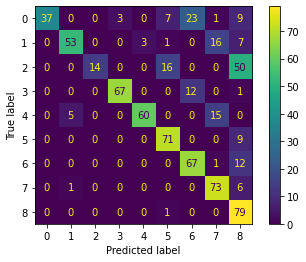

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

# -----------------------------

In [163]:
len(X_train)

180

In [ ]:
a[4]

In [257]:
classifier2 = KarcherLSR()
karcher = classifier2.fit(a[4],y_train)

(20, 400, 34)
(400, 34)


C:\Users\sahil\Documents\Final Project\Karcher_Mean.py:97: RuntimeWarning: invalid value encountered in arccos
  T[k] = np.real(np.arccos(S[k]))


CONVERGED after  9  iterations
CONVERGED after  14  iterations
CONVERGED after  11  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  9  iterations
CONVERGED after  14  iterations
CONVERGED after  8  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  23  iterations
CONVERGED after  9  iterations
CONVERGED after  8  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  11  iterations
CONVERGED after  19  iterations
CONVERGED after  10  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  8  iterations
CONVERGED after  37  iterations
CONVERGED after  13  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  26  iterations
CONVERGED after  7  iterations
CONVERGED after  7  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  9  iterations
CONVERGED after  17  iterations
CONVERGED after  11  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  10  iterations
CONVERGED after  21  iterations
CONVERGED after  8  iterations
(20, 400, 34)
(400, 34)
CONVERGED after  14  iterations
CONVERGED after  8

In [262]:
pred = classifier2.predict(X_test)

In [263]:
pred

[5,
 0,
 5,
 5,
 5,
 3,
 5,
 5,
 0,
 8,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 8,
 5,
 7,
 1,
 7,
 1,
 7,
 7,
 1,
 1,
 7,
 1,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 8,
 5,
 5,
 5,
 8,
 5,
 8,
 5,
 8,
 8,
 5,
 8,
 5,
 8,
 8,
 8,
 5,
 8,
 8,
 6,
 8,
 8,
 3,
 3,
 3,
 3,
 6,
 3,
 6,
 3,
 5,
 3,
 6,
 3,
 3,
 3,
 8,
 3,
 5,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 4,
 4,
 7,
 7,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 8,
 6,
 6,
 8,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 5,
 8,
 8,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 8,
 5,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 8,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 7,
 7,
 7,
 7,
 7,
 1,
 7,
 7,
 7,
 2,
 8,
 7,
 5,
 5,
 8,
 5,
 2,
 8,
 5,
 8,
 5,
 8,
 8,
 5,
 8,
 8,
 5,
 2,
 2,
 3,
 3,
 3,
 7,
 7,
 3,
 3,
 5,
 3,
 3,
